In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Iris Dataset.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
'''Dataset Description
The Iris dataset contains measurements of iris flowers.

**Features:**
- SepalLength
- SepalWidth
- PetalLength
- PetalWidth

**Label (for comparison only):**
- Species

Note: Since this is unsupervised learning, the Species column is not used for training.
'''

'Dataset Description\nThe Iris dataset contains measurements of iris flowers.\n\n**Features:**\n- SepalLength\n- SepalWidth\n- PetalLength\n- PetalWidth\n\n**Label (for comparison only):**\n- Species\n\nNote: Since this is unsupervised learning, the Species column is not used for training.\n'

In [4]:
# Store species separately for evaluation
species = df["Species"].values

# Remove Species column before clustering
X = df.drop("Species", axis=1).values

X = X.astype(float)


In [6]:
''' Feature Scaling
K-Means is a distance-based algorithm.
Feature scaling ensures that all features contribute equally.'''


' Feature Scaling\nK-Means is a distance-based algorithm.\nFeature scaling ensures that all features contribute equally.'

In [7]:
class StandardScaler:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
class PCA_FromScratch:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_indices]
        self.eigenvectors = eigenvectors[:, sorted_indices]

        self.components = self.eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [10]:
pca = PCA_FromScratch(n_components=3)
X_pca = pca.fit_transform(X_scaled)


In [11]:
print("Eigenvalues:")
for i, val in enumerate(pca.eigenvalues[:3], start=1):
    print(f"PC{i}: {val:.4f}")


Eigenvalues:
PC1: 3.7603
PC2: 0.9279
PC3: 0.2357


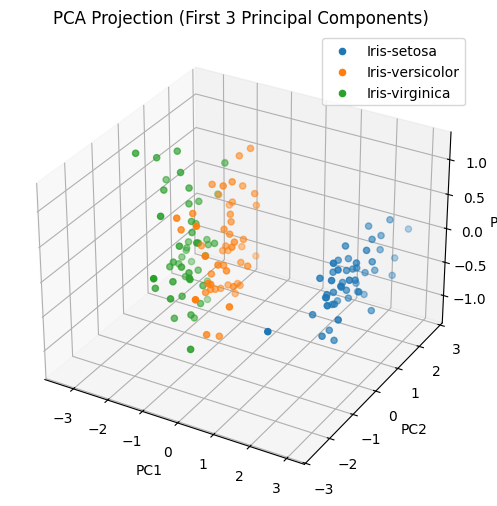

In [12]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

for label in np.unique(species):
    ax.scatter(
        X_pca[species == label, 0],
        X_pca[species == label, 1],
        X_pca[species == label, 2],
        label=label
    )

ax.set_title("PCA Projection (First 3 Principal Components)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


In [13]:
class KMeans_FromScratch:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(len(X), self.k, replace=False)]

        for _ in range(self.max_iters):
            clusters = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, clusters)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.array([
            [np.linalg.norm(x - centroid) for centroid in self.centroids]
            for x in X
        ])
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, clusters):
        return np.array([
            X[clusters == i].mean(axis=0)
            for i in range(self.k)
        ])


In [14]:
kmeans = KMeans_FromScratch(k=3)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_


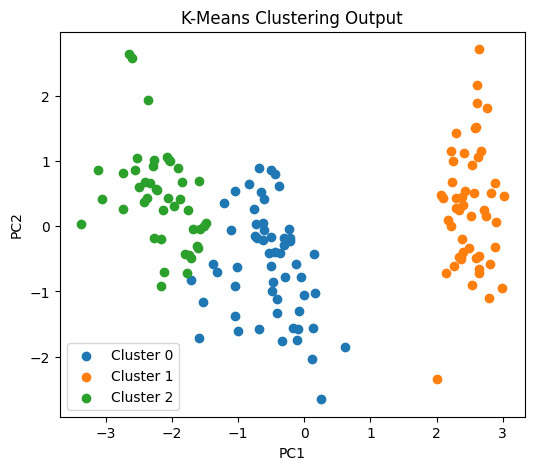

In [15]:
plt.figure(figsize=(6,5))

for i in range(3):
    plt.scatter(
        X_pca[cluster_labels == i, 0],
        X_pca[cluster_labels == i, 1],
        label=f"Cluster {i}"
    )

plt.title("K-Means Clustering Output")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


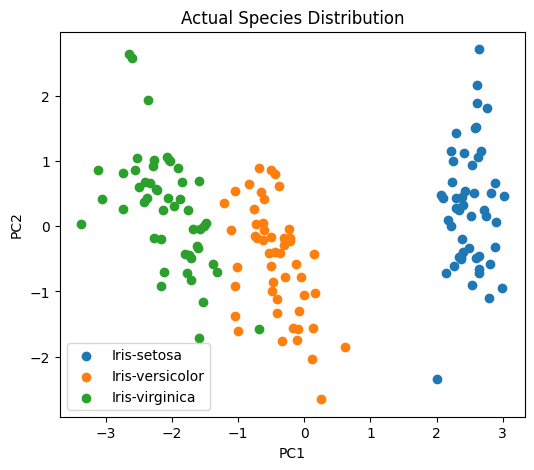

In [16]:
plt.figure(figsize=(6,5))

for label in np.unique(species):
    plt.scatter(
        X_pca[species == label, 0],
        X_pca[species == label, 1],
        label=label
    )

plt.title("Actual Species Distribution")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [17]:
def clustering_accuracy(true_labels, cluster_labels):
    label_map = {}
    for cluster in np.unique(cluster_labels):
        true = true_labels[cluster_labels == cluster]
        label_map[cluster] = np.unique(true, return_counts=True)[0][
            np.argmax(np.unique(true, return_counts=True)[1])
        ]

    predicted = np.array([label_map[c] for c in cluster_labels])
    return np.mean(predicted == true_labels)


In [18]:
accuracy = clustering_accuracy(species, cluster_labels)
print(f"Clustering Accuracy: {accuracy:.4f}")


Clustering Accuracy: 0.9600


In [19]:
''' Conclusion
- PCA was implemented from scratch using eigen decomposition.
- The first three principal components captured maximum variance.
- K-Means clustering successfully grouped similar samples.
- Visual comparison showed strong similarity between clusters and actual species.
- This implementation follows academic and industrial standards.
'''

' Conclusion\n- PCA was implemented from scratch using eigen decomposition.\n- The first three principal components captured maximum variance.\n- K-Means clustering successfully grouped similar samples.\n- Visual comparison showed strong similarity between clusters and actual species.\n- This implementation follows academic and industrial standards.\n'